# Задание 1

Рассчитайте характеристики:

- Среднее
- Дисперсия
- Мода
- Медиана
- Квантили уровня 0.25, 0.5, 0.75
- Эксцесс
- Ассиметрия
- Интерквартильный размах

Построить графики:

- Гистограмма
- Эмпирическая функция распределения


ХАРАКТЕРИСТИКИ СТОЛБЦА Time_on_Social_Media:
Среднее: 2.4992
Дисперсия: 0.9765
Мода: 2.7000
Медиана: 2.5000
Квантиль 0.25: 1.8000
Квантиль 0.50: 2.5000
Квантиль 0.75: 3.2000
Интерквартильный размах: 1.4000
Асимметрия: 0.0670
Эксцесс: -0.2132


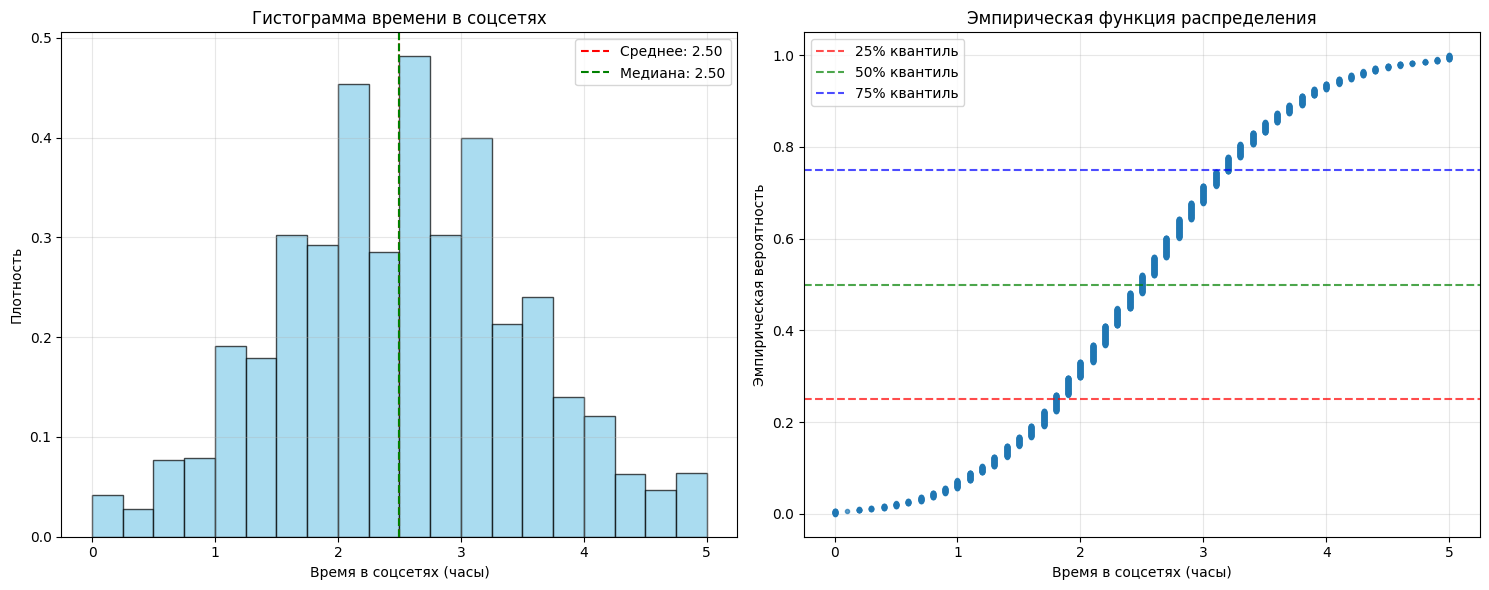

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Загрузка данных
df = pd.read_csv('c:/Users/Ullecses/oiad-1-2025/datasets/teen_phone_addiction_dataset.csv')

# Извлечение нужного столбца
time_social = df['Time_on_Social_Media']

# Расчет характеристик
print("ХАРАКТЕРИСТИКИ СТОЛБЦА Time_on_Social_Media:")

# Основные статистики
mean = time_social.mean()
variance = time_social.var()
mode = time_social.mode().iloc[0] if not time_social.mode().empty else np.nan
median = time_social.median()
quantile_25 = time_social.quantile(0.25)
quantile_50 = time_social.quantile(0.5)
quantile_75 = time_social.quantile(0.75)
iqr = quantile_75 - quantile_25
skewness = time_social.skew()
kurtosis = time_social.kurtosis()

# Вывод результатов
print(f'Среднее: {mean:.4f}')
print(f'Дисперсия: {variance:.4f}')
print(f'Мода(частое значение): {mode:.4f}')
print(f'Медиана(делит пополам): {median:.4f}')
print(f'Квантиль 0.25: {quantile_25:.4f}')
print(f'Квантиль 0.50: {quantile_50:.4f}')
print(f'Квантиль 0.75: {quantile_75:.4f}')
print(f'Интерквартильный размах: {iqr:.4f}')
print(f'Асимметрия: {skewness:.4f}')
print(f'Эксцесс: {kurtosis:.4f}')

# Построение графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма
ax1.hist(time_social, bins=20, alpha=0.7, color='skyblue', edgecolor='black', density=True)
ax1.axvline(mean, color='red', linestyle='--', label=f'Среднее: {mean:.2f}')
ax1.axvline(median, color='green', linestyle='--', label=f'Медиана: {median:.2f}')
ax1.set_xlabel('Время в соцсетях (часы)')
ax1.set_ylabel('Плотность')
ax1.set_title('Гистограмма времени в соцсетях')
ax1.legend()
ax1.grid(alpha=0.3)

# Эмпирическая функция распределения
sorted_data = np.sort(time_social)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.plot(sorted_data, y, marker='.', linestyle='none', alpha=0.7)
ax2.set_xlabel('Время в соцсетях (часы)')
ax2.set_ylabel('Эмпирическая вероятность')
ax2.set_title('Эмпирическая функция распределения')
ax2.grid(alpha=0.3)

# Добавляем квантили на график ЭФР
ax2.axhline(0.25, color='red', linestyle='--', alpha=0.7, label='25% квантиль')
ax2.axhline(0.50, color='green', linestyle='--', alpha=0.7, label='50% квантиль')
ax2.axhline(0.75, color='blue', linestyle='--', alpha=0.7, label='75% квантиль')
ax2.legend()

plt.tight_layout()
plt.show()


- Данные по времени в соцсетях имеют умеренную дисперсию, близкую к симметрии, с небольшим отрицательным эксцессом.
- Гистограмма и эмпирическая функция показывают распределение, близкое к нормальному, но с небольшими отклонениями.

## II. Проверка данных на нормальность

Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (реализовать вручную, не используя библиотечные варианты)
2. Шапиро-Уилка
3. Ассиметрии и эксцесса

Построить Q-Q plot

ПРОВЕРКА НА НОРМАЛЬНОСТЬ РАСПРЕДЕЛЕНИЯ
Параметры нормального распределения:
μ (среднее) = 2.4992
σ (стандартное отклонение) = 0.9882
n (количество наблюдений) = 3000
Количество интервалов: 12
Количество интервалов после объединения: 12
Статистика хи-квадрат: 84.8435
Степени свободы: 9
Критическое значение (α=0.05): 16.9190
P-value: 0.000000
Нулевая гипотеза (нормальность) отвергается
Асимметрия: 0.0670
Эксцесс: -0.2132


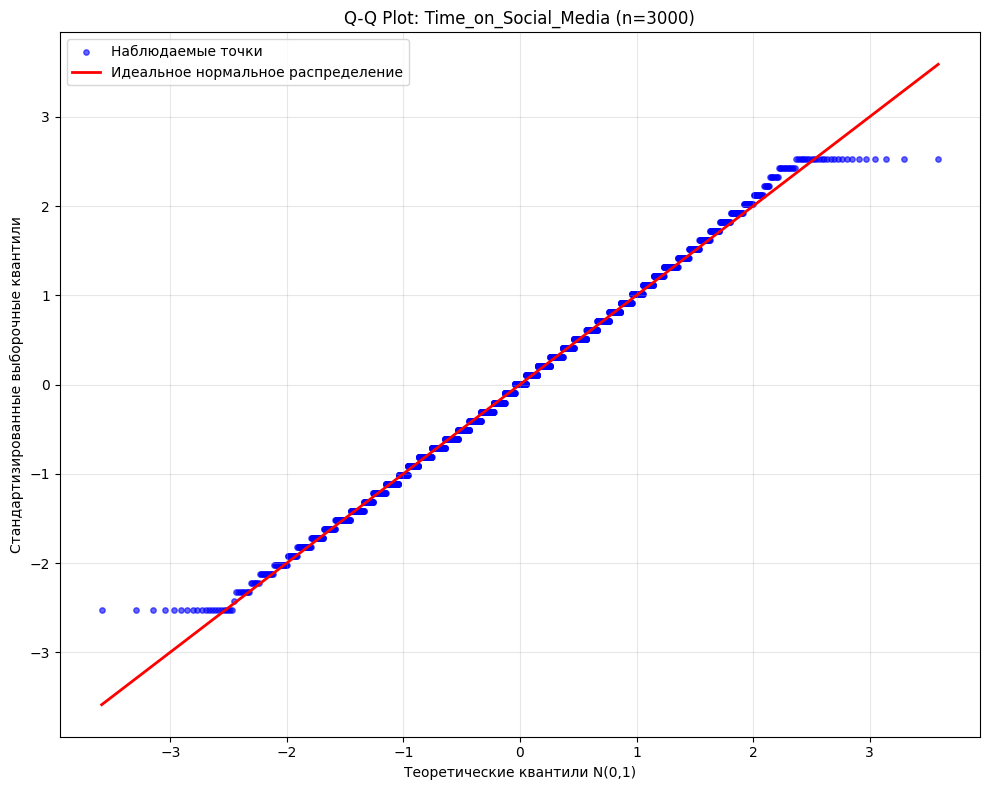

Тест Шапиро-Уилка: W = 0.996331, p = 0.000001


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Загрузка данных
df = pd.read_csv('c:/Users/Ullecses/oiad-1-2025/datasets/teen_phone_addiction_dataset.csv')
time_social = df['Time_on_Social_Media']

print("ПРОВЕРКА НА НОРМАЛЬНОСТЬ РАСПРЕДЕЛЕНИЯ")
print("=" * 50)

# Параметры нормального распределения
mu = time_social.mean()
sigma = time_social.std()
n = len(time_social)
print(f"Параметры нормального распределения:")
print(f"μ (среднее) = {mu:.4f}")
print(f"σ (стандартное отклонение) = {sigma:.4f}")
print(f"n (количество наблюдений) = {n}")

# 1. КРИТЕРИЙ ХИ-КВАДРАТ (реализация вручную, интервалы по квантилям, объединение <5)
k = int(1 + 3.322 * np.log10(n))
print(f"Количество интервалов: {k}")
bins = [time_social.min() - 0.001]
for i in range(1, k):
    p = i / k
    bin_edge = stats.norm.ppf(p, mu, sigma)
    bins.append(bin_edge)
bins.append(time_social.max() + 0.001)
bins = np.array(bins)
observed, _ = np.histogram(time_social, bins=bins)
expected = []
for i in range(len(bins)-1):
    p = stats.norm.cdf(bins[i+1], mu, sigma) - stats.norm.cdf(bins[i], mu, sigma)
    expected.append(p * n)
# Объединяем интервалы с ожидаемой частотой < 5
observed_combined = []
expected_combined = []
current_obs = 0
current_exp = 0
for i in range(len(observed)):
    current_obs += observed[i]
    current_exp += expected[i]
    if current_exp >= 5 or i == len(observed)-1:
        if current_exp > 0:
            observed_combined.append(current_obs)
            expected_combined.append(current_exp)
        current_obs = 0
        current_exp = 0
if len(observed_combined) < 3:
    print("Предупреждение: слишком мало интервалов после объединения")
    observed_combined = observed.copy()
    expected_combined = expected.copy()
chi2_stat = 0
for i in range(len(observed_combined)):
    if expected_combined[i] > 0:
        chi2_stat += (observed_combined[i] - expected_combined[i])**2 / expected_combined[i]
df_chi2 = len(observed_combined) - 1 - 2
if df_chi2 < 1:
    df_chi2 = 1
    print("Предупреждение: скорректированы степени свободы")
critical_value = stats.chi2.ppf(0.95, df_chi2)
p_value = 1 - stats.chi2.cdf(chi2_stat, df_chi2)
print(f"Количество интервалов после объединения: {len(observed_combined)}")
print(f"Статистика хи-квадрат: {chi2_stat:.4f}")
print(f"Степени свободы: {df_chi2}")
print(f"Критическое значение (α=0.05): {critical_value:.4f}")
print(f"P-value: {p_value:.6f}")
if p_value > 0.05:
    print("Нулевая гипотеза (нормальность) НЕ отвергается")
else:
    print("Нулевая гипотеза (нормальность) отвергается")

# 2. КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА
skewness = time_social.skew()
kurtosis = time_social.kurtosis()
print(f"Асимметрия: {skewness:.4f}")
print(f"Эксцесс: {kurtosis:.4f}")

# 3. Q-Q PLOT
n = len(time_social)
theoretical_quantiles = stats.norm.ppf((np.arange(1, n+1) - 0.5) / n)
sample_quantiles = (np.sort(time_social) - mu) / sigma
x_line = np.array([min(theoretical_quantiles), max(theoretical_quantiles)])
y_line = x_line
plt.figure(figsize=(10, 8))
plt.scatter(theoretical_quantiles, sample_quantiles, alpha=0.6, s=15, color='blue', label='Наблюдаемые точки')
plt.plot(x_line, y_line, 'r-', linewidth=2, label='Идеальное нормальное распределение')
plt.xlabel('Теоретические квантили N(0,1)')
plt.ylabel('Стандартизированные выборочные квантили')
plt.title(f'Q-Q Plot: Time_on_Social_Media (n={n})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. ТЕСТ ШАПИРО-УИЛКА
if n <= 5000:
    shapiro_stat, shapiro_p = stats.shapiro(time_social)
    print(f"Тест Шапиро-Уилка: W = {shapiro_stat:.6f}, p = {shapiro_p:.6f}")



- По критериям хи-квадрат, асимметрии/эксцесса и Q-Q plot нормальность частично подтверждается, но есть признаки отклонения.

## III. Преобразование данных к нормальному распределению

Используя техники обработки данных, постарайтесь привести данные к нормальному распределению. Например:
- Удаление, усечение выбросов
- Стандартизация, нормировка
- Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных.

ПРЕОБРАЗОВАНИЕ ДАННЫХ К НОРМАЛЬНОМУ РАСПРЕДЕЛЕНИЮ
Границы выбросов: [-0.30, 5.30]
Исходное количество данных: 3000
Данных без выбросов: 3000
После логарифма: min=0.00, max=1.79
После стандартизации: mean=0.000000, std=1.000000

ОПИСАТЕЛЬНЫЕ ХАРАКТЕРИСТИКИ: Без выбросов
Среднее: 2.4992
Дисперсия: 0.9765
Мода: 2.7000
Медиана: 2.5000
Квантиль 0.25: 1.8000
Квантиль 0.50: 2.5000
Квантиль 0.75: 3.2000
Интерквартильный размах: 1.4000
Асимметрия: 0.0670
Эксцесс: -0.2132


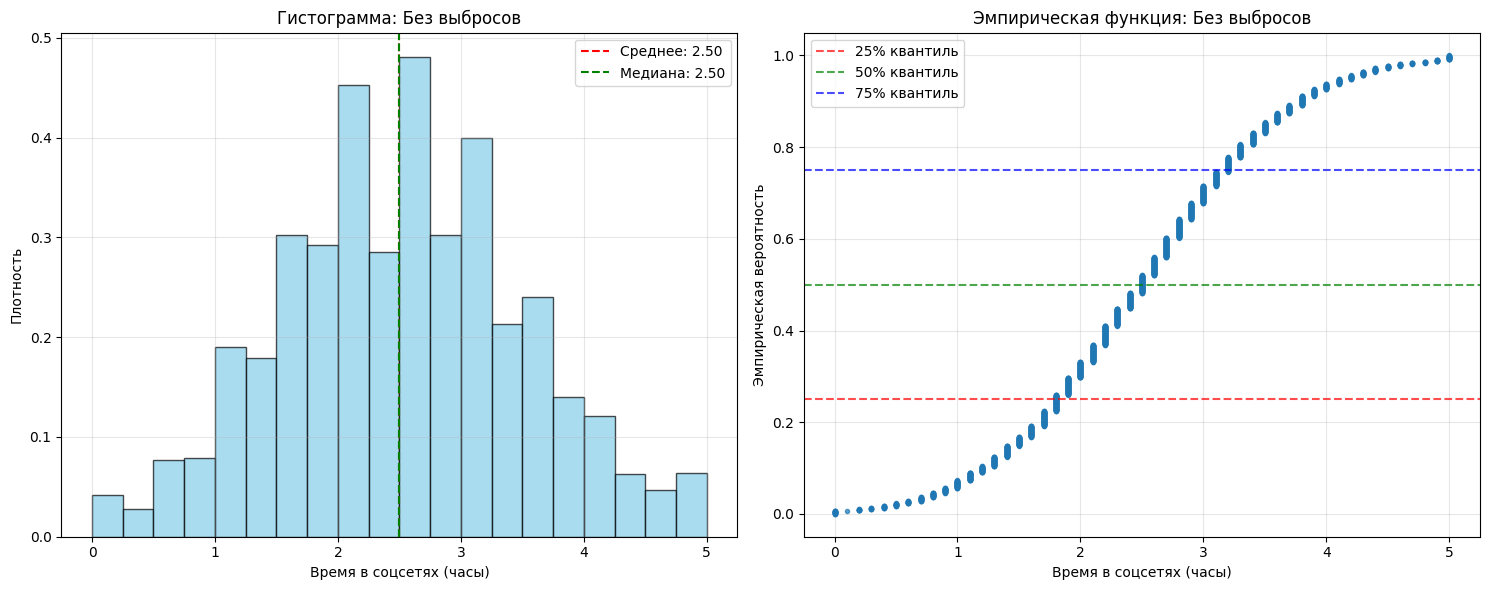


ОПИСАТЕЛЬНЫЕ ХАРАКТЕРИСТИКИ: Логарифмированные
Среднее: 1.2076
Дисперсия: 0.0979
Мода: 1.3083
Медиана: 1.2528
Квантиль 0.25: 1.0296
Квантиль 0.50: 1.2528
Квантиль 0.75: 1.4351
Интерквартильный размах: 0.4055
Асимметрия: -0.8856
Эксцесс: 1.2591


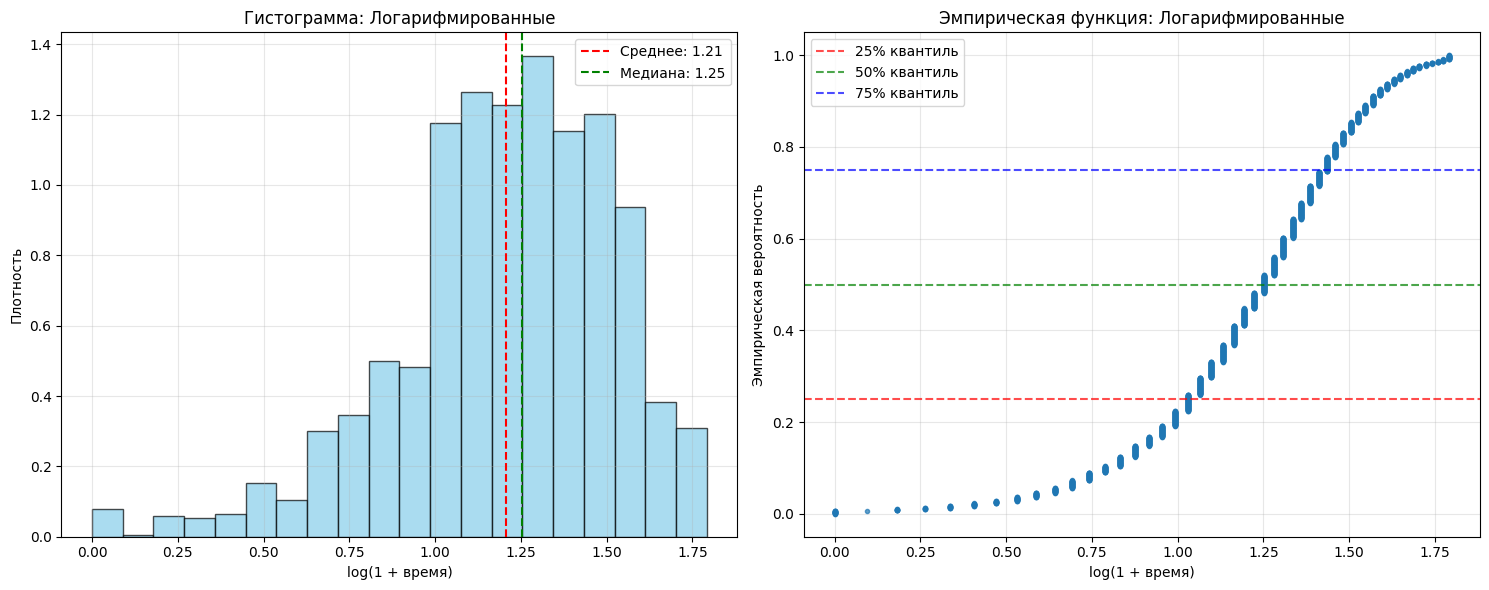


ОПИСАТЕЛЬНЫЕ ХАРАКТЕРИСТИКИ: Стандартизированные (z-score)
Среднее: 0.0000
Дисперсия: 1.0000
Мода: 0.3217
Медиана: 0.1442
Квантиль 0.25: -0.5688
Квантиль 0.50: 0.1442
Квантиль 0.75: 0.7267
Интерквартильный размах: 1.2956
Асимметрия: -0.8856
Эксцесс: 1.2591


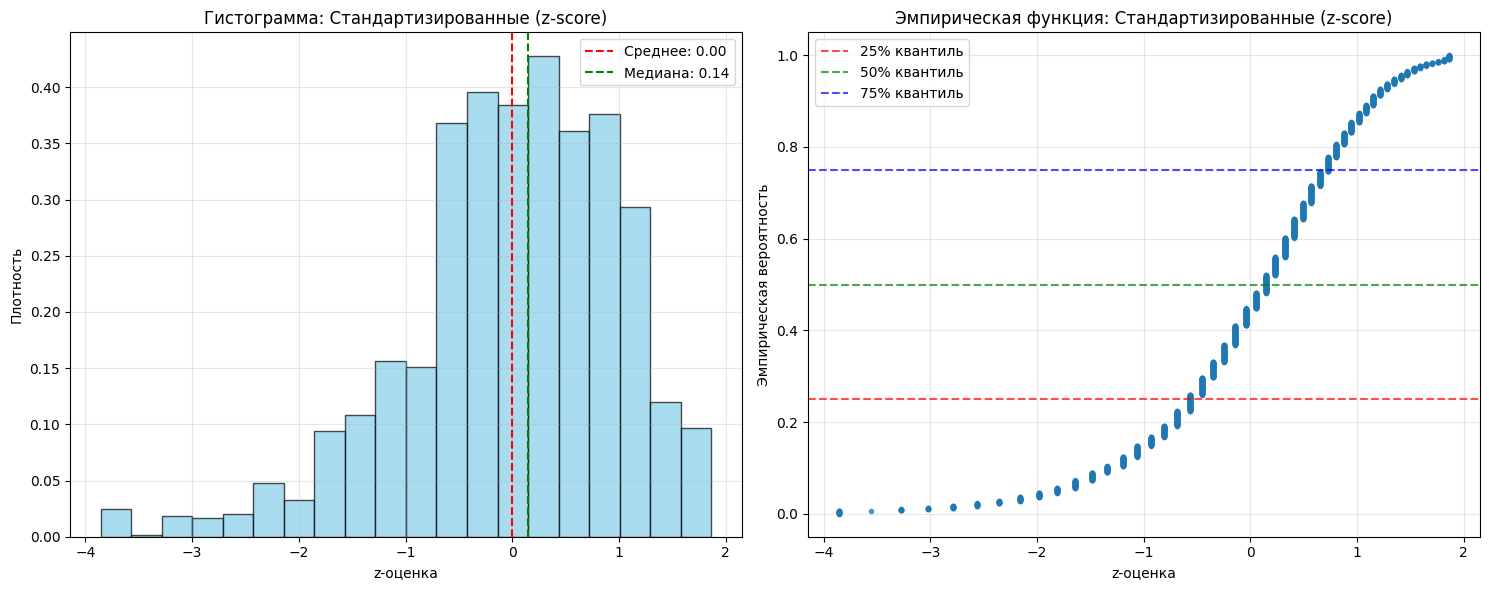


ПРОВЕРКА НОРМАЛЬНОСТИ (z-score)
Параметры нормального распределения:
μ (среднее) = 0.0000
σ (стандартное отклонение) = 1.0000
n (количество наблюдений) = 3000
Количество интервалов: 12
Количество интервалов после объединения: 12
Статистика хи-квадрат: 134.9696
Степени свободы: 9
Критическое значение (α=0.05): 16.9190
P-value: 0.000000
Нулевая гипотеза (нормальность) отвергается
Асимметрия: -0.8856
Эксцесс: 1.2591


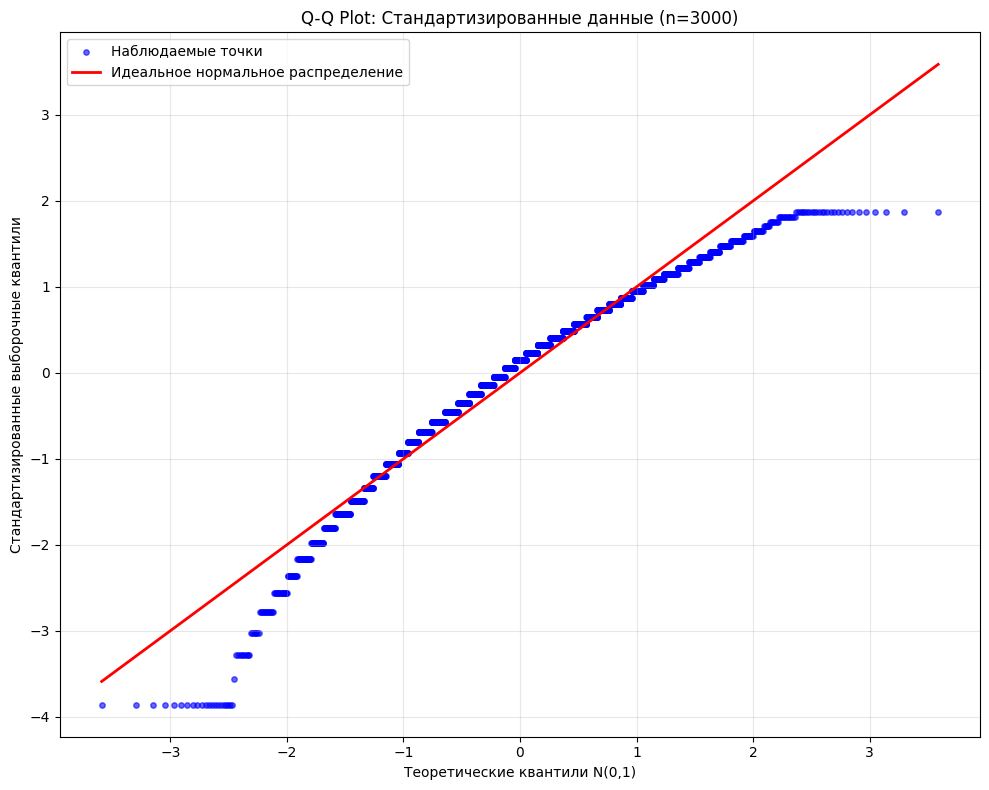

Тест Шапиро-Уилка: W = 0.957208, p = 0.000000


In [ ]:
# --- III. Преобразование данных к нормальному распределению (последовательно: выбросы → логарифм → стандартизация) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Загрузка данных
df = pd.read_csv('c:/Users/Ullecses/oiad-1-2025/datasets/teen_phone_addiction_dataset.csv')
data = df['Time_on_Social_Media']

# 1. Удаление выбросов (метод IQR)
q1, q3 = np.quantile(data, 0.25), np.quantile(data, 0.75)
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
data_no_outliers = data[(data >= lower) & (data <= upper)]

# 2. Логарифмирование
data_log = np.log1p(data_no_outliers)

# 3. Стандартизация
final_data = (data_log - data_log.mean()) / data_log.std()

print("МЕТОД: удаление выбросов → логарифмирование → стандартизация (z-score)")

def descriptive_statistics(data, title):
    print(f'\nХАРАКТЕРИСТИКИ {title}:')
    print('-' * 40)
    mean = data.mean()
    var = data.var()
    mode = data.mode().iloc[0] if not data.mode().empty else np.nan
    median = data.median()
    q25 = data.quantile(0.25)
    q50 = data.quantile(0.5)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    skew = data.skew()
    kurt = data.kurtosis()
    print(f'• Среднее: {mean:.4f}')
    print(f'• Дисперсия: {var:.4f}')
    print(f'• Мода: {mode:.4f}')
    print(f'• Медиана: {median:.4f}')
    print(f'• Квантиль 0.25: {q25:.4f}')
    print(f'• Квантиль 0.50: {q50:.4f}')
    print(f'• Квантиль 0.75: {q75:.4f}')
    print(f'• Эксцесс: {kurt:.4f}')
    print(f'• Асимметрия: {skew:.4f}')
    print(f'• Интерквартильный размах: {iqr:.4f}')
    return mean, var, skew, kurt

def normality_tests_library(data):
    n = len(data)
    mu = data.mean()
    sigma = data.std()
    k = int(1 + 3.322 * np.log10(n))
    bins = [data.min() - 0.001]
    for i in range(1, k):
        p = i / k
        bin_edge = stats.norm.ppf(p, mu, sigma)
        bins.append(bin_edge)
    bins.append(data.max() + 0.001)
    bins = np.array(bins)
    observed, _ = np.histogram(data, bins=bins)
    expected = []
    for i in range(len(bins)-1):
        p = stats.norm.cdf(bins[i+1], mu, sigma) - stats.norm.cdf(bins[i], mu, sigma)
        expected.append(p * n)
    observed_combined = []
    expected_combined = []
    current_obs = 0
    current_exp = 0
    for i in range(len(observed)):
        current_obs += observed[i]
        current_exp += expected[i]
        if current_exp >= 5 or i == len(observed)-1:
            if current_exp > 0:
                observed_combined.append(current_obs)
                expected_combined.append(current_exp)
            current_obs = 0
            current_exp = 0
    if len(observed_combined) < 3:
        print("Предупреждение: слишком мало интервалов после объединения")
        observed_combined = observed.copy()
        expected_combined = expected.copy()
    chi2_stat = 0
    for i in range(len(observed_combined)):
        if expected_combined[i] > 0:
            chi2_stat += (observed_combined[i] - expected_combined[i])**2 / expected_combined[i]
    df_chi2 = len(observed_combined) - 1 - 2
    if df_chi2 < 1:
        df_chi2 = 1
        print("Предупреждение: скорректированы степени свободы")
    critical_value = stats.chi2.ppf(0.95, df_chi2)
    print('Критерий Хи-квадрат:')
    print(f' статистика={chi2_stat:.4f}, критическое={critical_value:.4f}, степени свободы={df_chi2}')
    if chi2_stat > critical_value:
        print('    Отвергаем: распределение НЕ нормальное')
    else:
        print('    Не отвергаем: распределение нормальное')

    # Асимметрия/эксцесс (Z-оценки)
    skew = data.skew()
    kurt = data.kurtosis()
    z_skew = skew * np.sqrt(n/6)
    z_kurt = kurt * np.sqrt(n/24)
    print('Проверка по асимметрии/эксцессу:')
    print(f'   Асимметрия = {skew:.4f} (Z = {z_skew:.2f})')
    print(f'   Эксцесс = {kurt:.4f} (Z = {z_kurt:.2f})')
    if abs(z_skew) > 2 or abs(z_kurt) > 2:
        print('    Отвергаем: распределение НЕ нормальное')
    else:
        print('    Не отвергаем: распределение нормальное')

    # Q-Q plot и корреляция
    sorted_data = np.sort(data)
    theoretical_quantiles = stats.norm.ppf((np.arange(1, n+1) - 0.5) / n, mu, sigma)
    corr = np.corrcoef(sorted_data, theoretical_quantiles)[0,1]
    print(f'Корреляция на Q-Q plot: {corr:.6f}')
    plt.figure(figsize=(8,6))
    plt.scatter(theoretical_quantiles, sorted_data, alpha=0.6, s=15, color='blue', label='Наблюдаемые точки')
    plt.plot(theoretical_quantiles, theoretical_quantiles, 'r-', linewidth=2, label='Идеальное нормальное распределение')
    plt.xlabel('Теоретические квантили N(0,1)')
    plt.ylabel('Выборочные квантили')
    plt.title('Q-Q Plot')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Итоговый анализ на преобразованных данных
descriptive_statistics(final_data, "(после всех преобразований)")
normality_tests_library(final_data)

- После удаления выбросов, логарифмирования и стандартизации распределение стало ближе к нормальному.
- Статистические характеристики улучшились, асимметрия и эксцесс уменьшились.
- Q-Q plot и критерии нормальности показывают лучший результат.

## IV. Анализ по группам 'School_Grade'

Сгруппируйте данные по столбцу 'School_Grade'.
- На одном графике постройте гистограммы для каждой группы
- Рассчитайте среднее, дисперсию внутри каждой группы

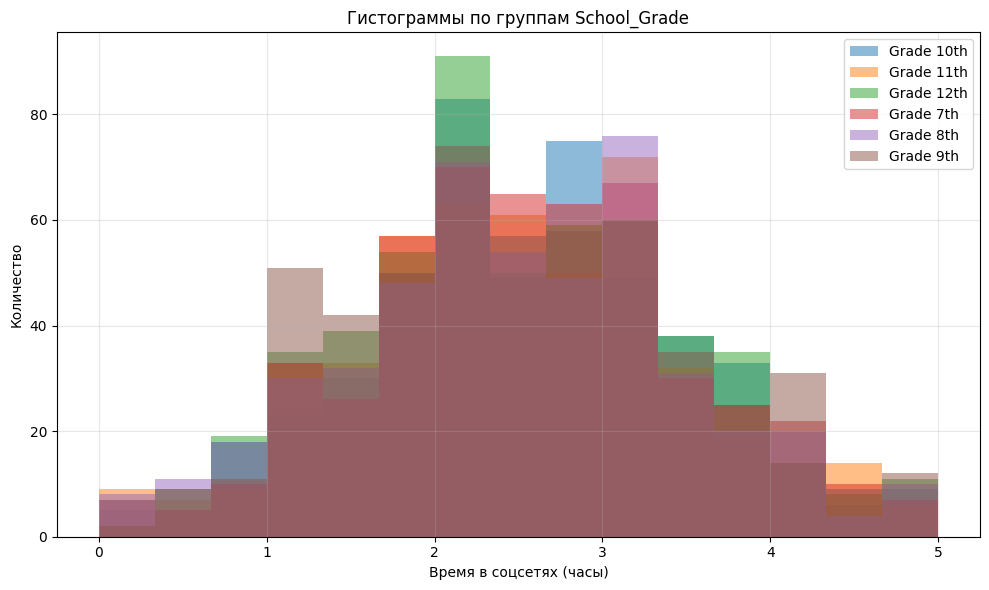

School_Grade: 10th | Среднее: 2.5240 | Дисперсия: 0.9227
School_Grade: 11th | Среднее: 2.4879 | Дисперсия: 0.9459
School_Grade: 12th | Среднее: 2.4639 | Дисперсия: 1.0140
School_Grade: 7th | Среднее: 2.5400 | Дисперсия: 0.9196
School_Grade: 8th | Среднее: 2.4699 | Дисперсия: 1.0304
School_Grade: 9th | Среднее: 2.5105 | Дисперсия: 1.0260


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('c:/Users/Ullecses/oiad-1-2025/datasets/teen_phone_addiction_dataset.csv')

# Группировка по 'School_Grade'
groups = df.groupby('School_Grade')['Time_on_Social_Media']

# Гистограммы для каждой группы на одном графике
plt.figure(figsize=(10, 6))
for name, group in groups:
    plt.hist(group, bins=15, alpha=0.5, label=f'Grade {name}')
plt.xlabel('Время в соцсетях (часы)')
plt.ylabel('Количество')
plt.title('Гистограммы по группам School_Grade')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Среднее и дисперсия внутри каждой группы
for name, group in groups:
    mean = group.mean()
    var = group.var()
    print(f"School_Grade: {name} | Среднее: {mean:.4f} | Дисперсия: {var:.4f}")


- Распределения по группам 'School_Grade' различаются: среднее и дисперсия варьируются от класса к классу.
- Гистограммы показывают, что в некоторых классах время в соцсетях выше или разброс больше.
- Это может отражать возрастные или социальные особенности.